## Observations and Insights 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
cD = mouse_metadata.merge(study_results, on='Mouse ID')

# Display the data table for preview
cD.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice.
cD['Mouse ID'].nunique()


249

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

cD[cD.duplicated(['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
# Optional: Get all the data for the duplicate mouse ID. 

cD[cD['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean =cD[cD['Mouse ID'] != 'g989']
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()


248

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


cGBr=clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

sumStats_df = pd.DataFrame({'Mean': cGBr.mean(), 'Median': cGBr.median(), 'Variance': cGBr.var(), 'Standard Deviation': cGBr.var(), 'SEM': cGBr.sem()})
sumStats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,59.450562,0.573111


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#cGBrA = cGBr.agg(['mean', 'median', 'var', 'std', 'sem'])
cGBrA = clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
cGBrA

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

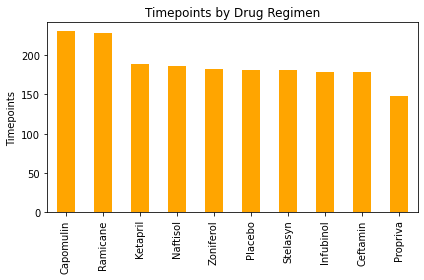

In [124]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

cGBrt_count=clean['Drug Regimen'].value_counts()
cGBrt_count.plot(kind='bar', ylabel='Timepoints', title='Timepoints by Drug Regimen',facecolor='orange')
plt.tight_layout()

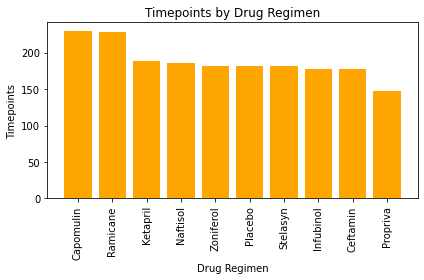

In [122]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(x = cGBrt_count.index.values, height = cGBrt_count.values, facecolor='orange')

plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')
plt.title('Timepoints by Drug Regimen')
plt.tight_layout()

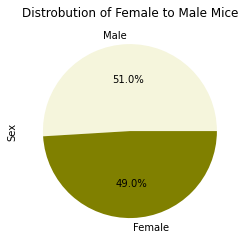

In [125]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cGBrt_count2=clean['Sex'].value_counts()

cGBrt_count2.plot(kind='pie', y='Mouse ID', autopct="%1.1f%%", ylabel='Sex', title = ['Distrobution of Female to Male Mice'], colors = ['beige', 'olive'], subplots = True)
plt.show()

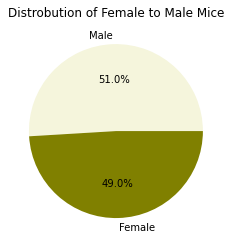

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(cGBrt_count2.values, labels=cGBrt_count2.index.values, autopct='%1.1f%%', colors= ['beige', 'olive'])
plt.title(f'Distrobution of Female to Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gtpm = clean.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mgtpm = gtpm.reset_index().merge(clean, on=['Mouse ID', 'Timepoint'], how='left')
mgtpm.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [91]:
# Put treatments into a list for for loop (and later for plot labels)

trtmntlst = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumvollst = []

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

##for dr in trtmntlst:
    
for dr in trtmntlst:   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumvol = mgtpm.loc[mgtpm['Drug Regimen'] == dr, 'Tumor Volume (mm3)']

    # add subset 
    tumvollst.append(tumvol)

    # Determine outliers using upper and lower bounds

    quartiles = tumvol.quantile([.25,.50,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]

    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)

    outliers = tumvol.loc[(tumvol < lowerbound)|(tumvol > upperbound)]

    if outliers.count() != 0:
        print(f"{dr}'s potential outliers: {outliers}")

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


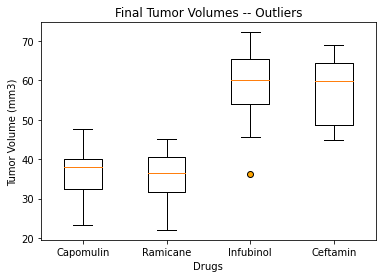

In [92]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

b_d = dict(markerfacecolor='Orange', marker='o')
plt.boxplot(tumvollst, flierprops=b_d)

plt.title('Final Tumor Volumes -- Outliers')

plt.xlabel('Drugs')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(np.arange(1,5), labels=trtmntlst)

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

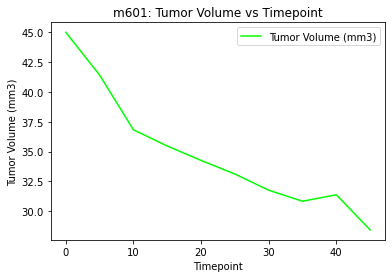

In [93]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomouse = 'm601'

Capomulin_mouse_df = clean.loc[clean['Mouse ID'] == capomouse]
Capomulin_mouse_df.plot.line('Timepoint', 'Tumor Volume (mm3)', c='Lime')

plt.title('m601: Tumor Volume vs Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


Text(0.5, 1.0, 'Capomulin: Mean Tumor Weight(g) vs Volume (mm3)')

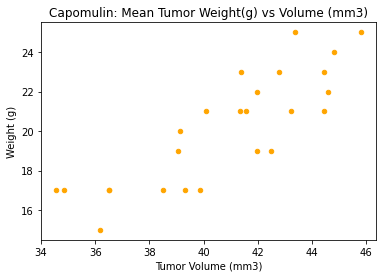

In [94]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo = clean.loc[clean['Drug Regimen'] == 'Capomulin']
mouse = capo.groupby('Mouse ID').mean()
mouse.plot.scatter('Tumor Volume (mm3)', 'Weight (g)', c='orange')
plt.title('Capomulin: Mean Tumor Weight(g) vs Volume (mm3)')

## Correlation and Regression

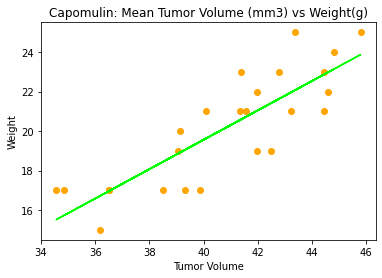

   Correlation coefficient
0                    0.842


In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tmrvm = mouse['Tumor Volume (mm3)']
wght = mouse['Weight (g)']
spc_r = st.pearsonr(tmrvm,wght)

corr = pd.DataFrame({'Correlation coefficient':([round(spc_r[0],3)])})

x_values = mouse['Tumor Volume (mm3)']
y_values = mouse['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values,c='orange')
plt.plot(x_values,regress_values,"r-", c='lime')

plt.title('Capomulin: Mean Tumor Volume (mm3) vs Weight(g)')
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
plt.show()

print(corr)
